In [33]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 

In [34]:
dir_data = './datas/'

In [35]:
f_app = os.path.join(dir_data,'application_train.csv')
print('Path of read in data: %s' % (f_app))

df = pd.read_csv(f_app)

Path of read in data: ./datas/application_train.csv


**Checking some infroamtion of current data**

In [36]:
print(df.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

**資料的 row 數以及 column 數**

In [37]:
data_rows, data_columns = df.shape
print('data rows: ',data_rows)
print('data columns: ',data_columns)

data rows:  307511
data columns:  122


**列出所有欄位**

In [38]:
print(df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


**截取部分資料**

In [39]:
print(df.head(5))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [40]:
print(df.NAME_CONTRACT_TYPE.head(5))

0         Cash loans
1         Cash loans
2    Revolving loans
3         Cash loans
4         Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object


In [41]:
some_columns = df.columns[1:7]
tempdf = df[some_columns]


**Use value count function to check  the data distrubution**

In [42]:
def checking_value_counts(data):
    keys = data.keys()
    for key in keys:
        print("Key:",key)
        print(data[key].value_counts())
        print('-'*100)

In [23]:
checking_value_counts(tempdf)

Key: TARGET
0    282686
1     24825
Name: TARGET, dtype: int64
----------------------------------------------------------------------------------------------------
Key: NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Key: CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------
Key: FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------------------------------------------------------------------------------------------------
Key: FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------------------------------------------------------------------------------------------------
Key: CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717


**endcoding some data with numbers**

In [43]:

tempdf.NAME_CONTRACT_TYPE.replace(to_replace='Cash loans', value = 0, inplace = True)
tempdf.NAME_CONTRACT_TYPE.replace(to_replace='Revolving loans',value = 1, inplace = True)
tempdf.CODE_GENDER.replace(to_replace='XNA',value = 'M', inplace = True)
tempdf.CODE_GENDER.replace(to_replace='M',value = 0, inplace = True)
tempdf.CODE_GENDER.replace(to_replace='F',value = 1, inplace = True)
tempdf.FLAG_OWN_CAR.replace(to_replace='N',value = 0, inplace = True)
tempdf.FLAG_OWN_CAR.replace(to_replace='Y',value = 1, inplace = True)
tempdf.FLAG_OWN_REALTY.replace(to_replace='Y',value = 1, inplace = True)
tempdf.FLAG_OWN_REALTY.replace(to_replace='N',value = 0, inplace = True)

**Using histogram to visualize some data**

In [45]:
def visDataInHist(data,columns,x,y):
    plt.figure(figsize=(x,y))
    for i, col in enumerate(columns):
        plt.subplot(len(columns)/4+1,3,i+1)
        data[col].hist()
        plt.title(col)
    plt.show()

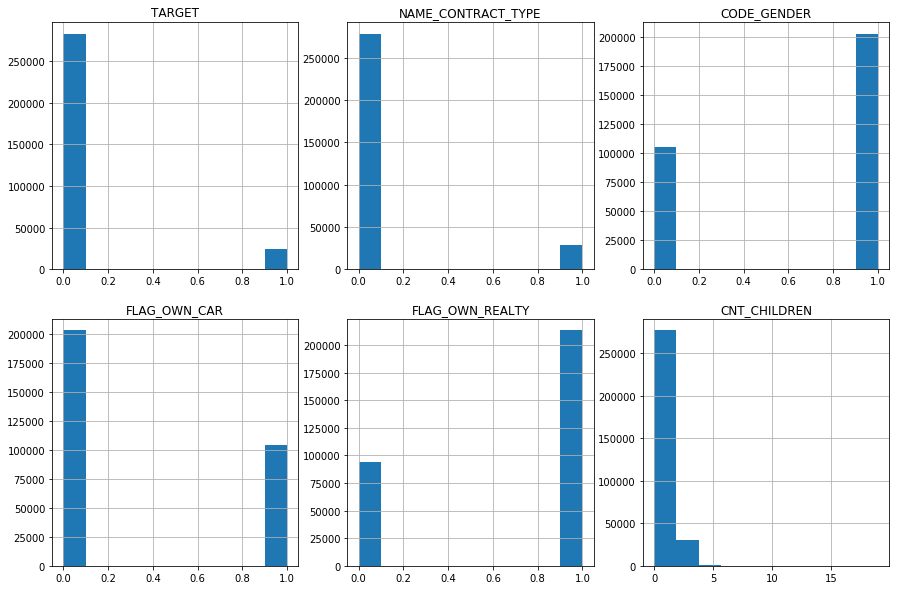

In [46]:
visDataInHist(tempdf,tempdf.columns,15,10)